In [ ]:
from google.colab import drive
drive.mount('/content/drive')


from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_file_path = '/content/drive/MyDrive/output/splitted/test'
train_file_path =  '/content/drive/MyDrive/output/splitted/train'
val_file_path =  '/content/drive/MyDrive/output/splitted/val'

valid_split = 0.2
input_size = (244, 244)
image_color = 'rgb'
batch_size = 32
shuffle=True
train_gen=ImageDataGenerator(rescale=1/255.0,validation_split=valid_split,fill_mode='nearest',rotation_range=40,horizontal_flip=True)

validation_gen=ImageDataGenerator(rescale=1/255.0,validation_split=valid_split)

test_gen=ImageDataGenerator(rescale=1/255.0)

train_data=train_gen.flow_from_directory(directory=train_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')
test_data=test_gen.flow_from_directory(directory=test_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')
valid_data=validation_gen.flow_from_directory(directory=val_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')


Mounted at /content/drive
Found 2711 images belonging to 4 classes.
Found 981 images belonging to 4 classes.
Found 984 images belonging to 4 classes.


In [ ]:
from keras.applications import DenseNet121,EfficientNetB0
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
import numpy as np

In [ ]:
!pip install  efficientnet
import efficientnet.tfkeras as enet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.3 MB/s eta 0:00:00


In [ ]:
# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 4

# Create the base pre-trained model
base_model = enet.EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)


16804768/16804768 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf
# Add a global spatial average pooling layer
x = base_model.output
x = tf.keras.layers.AveragePooling2D(pool_size=(7, 7))(x)
x = tf.keras.layers.Flatten()(x)

# Add a final softmax layer for classification
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base model and the top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_data, epochs=20, validation_data=valid_data)

Epoch 1/20
85/85 [==============================] - 2183s 26s/step - loss: 0.6233 - accuracy: 0.7761 - val_loss: 0.3826 - val_accuracy: 0.8770
Epoch 2/20
85/85 [==============================] - 59s 697ms/step - loss: 0.3584 - accuracy: 0.8705 - val_loss: 0.3166 - val_accuracy: 0.8882
Epoch 3/20
85/85 [==============================] - 56s 657ms/step - loss: 0.2919 - accuracy: 0.8978 - val_loss: 0.2873 - val_accuracy: 0.9024
Epoch 4/20
85/85 [==============================] - 57s 676ms/step - loss: 0.2635 - accuracy: 0.9089 - val_loss: 0.2609 - val_accuracy: 0.9055
Epoch 5/20
85/85 [==============================] - 56s 659ms/step - loss: 0.2443 - accuracy: 0.9177 - val_loss: 0.2517 - val_accuracy: 0.9116
Epoch 6/20
85/85 [==============================] - 60s 702ms/step - loss: 0.2320 - accuracy: 0.9192 - val_loss: 0.2428 - val_accuracy: 0.9055
Epoch 7/20
85/85 [==============================] - 60s 711ms/step - loss: 0.2218 - accuracy: 0.9222 - val_loss: 0.2346 - val_accuracy: 0.9187

In [ ]:
model.save("/content/drive/MyDrive/effnet.h5")

In [ ]:
op = model.predict(test_data)

31/31 [==============================] - 676s 22s/step


In [ ]:
op1 = np.argmax(op,axis=1)
len(op1),len(test_data.classes)

(981, 981)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
cm = confusion_matrix(test_data.classes,op1)
print(cm)

[[142  93  29  83]
 [119  78  19  69]
 [ 44  42   7  23]
 [ 95  70  14  54]]


print(classification_report(test_data.classes, op1))

In [ ]:
# Get the accuracy
accuracy = history.history['val_accuracy'][-1]

In [ ]:
print('Validation accuracy:', accuracy)

Validation accuracy: 0.9247967600822449


In [ ]:
test_acc = model.evaluate(test_data)
print('Test accuracy:', test_acc)

31/31 [==============================] - 6s 190ms/step - loss: 0.1948 - accuracy: 0.9266
Test accuracy: [0.1947668492794037, 0.9266055226325989]


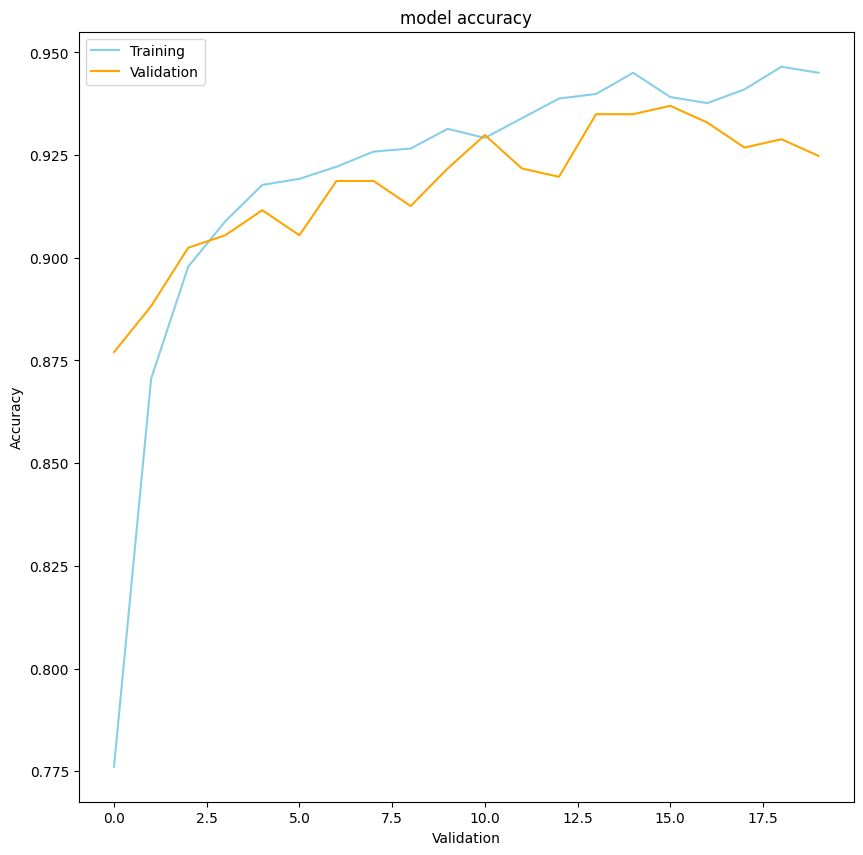

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'],color='skyblue')
plt.plot(history.history['val_accuracy'],color='orange')
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Validation")
plt.legend(["Training","Validation"])
plt.show()

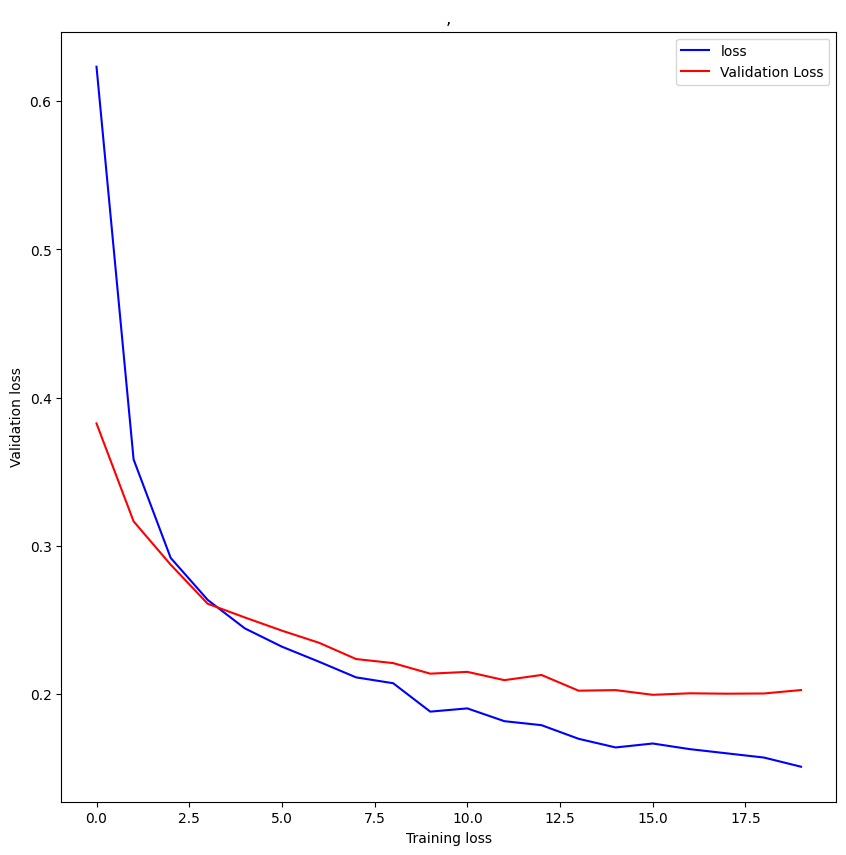

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='red')
plt.title(",")
plt.xlabel("Training loss")
plt.ylabel("Validation loss")
plt.legend(["loss","Validation Loss"])
plt.show()

In [ ]:
# Get the accuracy
accuracy_ = history.history['val_accuracy'][-1]

In [ ]:
print("ACCURACY :",accuracy_)

ACCURACY : 0.9450387358665466
